In [32]:
from prediction_helpers import *

In [33]:
ExE = pd.read_csv('../../extracted_data/ExE_imputed_5.csv', sep=',', index_col=0)
NxN = pd.read_csv('../../extracted_data/NxN_imputed_10.csv', sep=',', index_col=0)
ExN = pd.read_csv('../../extracted_data/ExN_filled_20.csv', sep=',', index_col=0)

In [34]:


predictive_models_ExE = [ 
    Lasso(alpha=0.0001),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42),
    create_neural_network(1)

]

predictive_models_NxN = [ 
    Lasso(alpha=0.00005),
    Ridge(alpha=10),
    RandomForestRegressor(n_estimators=10, random_state=42),
    create_neural_network(1)
]

predictive_models_ExN = [ 
    Lasso(alpha=0.00005),
    Ridge(alpha=5),
    RandomForestRegressor(n_estimators=10, random_state=42),
    create_neural_network(1)
]

random.seed(35)
proportion = 0.1

In [35]:
ExE

,TSA_YDR478W,TSA_YHR040W,TSA_YIL104C,TSA_YDR064W,TSA_YDL208W,TSA_YMR290C,TSA_YLL011W,TSA_YLR186W,TSA_YMR229C,TSA_YDR339C,...,TSA_YBL034C.4,TSA_YBR055C.1,TSA_YLR105C,TSA_YDL103C.1,TSA_YDL103C.2,TSA_YKL104C,TSA_YKL024C,TSA_YOR074C.1,TSA_YDR081C,TSA_YOR204W.2
gene_id,,,,,,,,,,,,,,,,,,,,,
YNL287W,0.034000,0.024000,0.023000,-0.053000,-0.041000,0.004000,0.023000,-0.015000,-0.008000,-0.061000,...,-0.005,-0.008,0.038,-0.010000,-0.018000,0.001000,0.009000,0.047000,-0.148000,0.014000
YCR093W,-0.371000,-0.041000,0.053000,-0.044000,-0.106000,-0.328000,0.023000,0.042000,-0.016000,0.110000,...,-0.153,-0.016,0.011,0.007000,0.033000,-0.017000,-0.045000,0.077000,0.047000,0.016000
YEL019C,-0.277000,-0.046000,-0.038000,-0.011000,0.052000,-0.035000,-0.080000,0.042000,0.021000,-0.056000,...,0.056,0.008,0.020,0.015000,0.009000,-0.010000,0.070000,-0.088000,-0.140000,0.049000
YCR002C,0.054000,0.027000,0.008000,0.024000,-0.046000,-0.020000,0.042000,0.018000,0.025000,0.010000,...,-0.011,-0.013,-0.018,0.007000,0.039000,0.038000,0.006000,0.030000,0.010000,0.006000
YCL059C,-0.069000,-0.082000,-0.134000,-0.624000,-0.542000,-0.139000,-0.029000,-0.065000,-0.570000,-0.120000,...,0.009,0.006,0.033,0.001000,-0.027000,-0.007000,0.036000,0.020000,-0.116000,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YML092C,-0.088000,-0.050000,-0.102000,-0.096000,0.028000,-0.054333,-0.018333,0.063000,-0.012000,-0.014333,...,0.003,-0.090,-0.004,0.005000,-0.010000,0.013333,-0.118000,-0.002000,0.160000,0.017333
YOL094C,0.026000,-0.056000,0.001000,-0.028333,0.019000,0.039000,0.056000,0.005000,0.001333,0.033000,...,-0.002,-0.021,0.006,-0.021000,-0.000000,0.045000,-0.002000,-0.001000,0.036000,0.358000
YIL004C,0.017000,0.015000,0.030000,-0.039000,0.072333,-0.014000,-0.003000,0.022667,0.015000,0.053000,...,0.007,0.037,-0.059,0.049000,-0.017000,-0.020000,-0.011000,-0.105333,0.097000,0.085000


## ExE

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1


Model: Lasso
Average R²:   0.3161
Average RMSE: 0.0595

Model: Ridge
Average R²:   0.3588
Average RMSE: 0.0581

Model: RandomForestRegressor
Average R²:   0.2266
Average RMSE: 0.0636

Model: Sequential
Average R²:   0.2804
Average RMSE: 0.0614


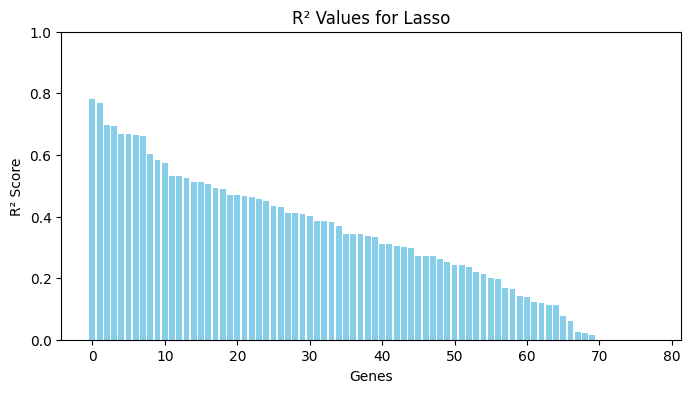

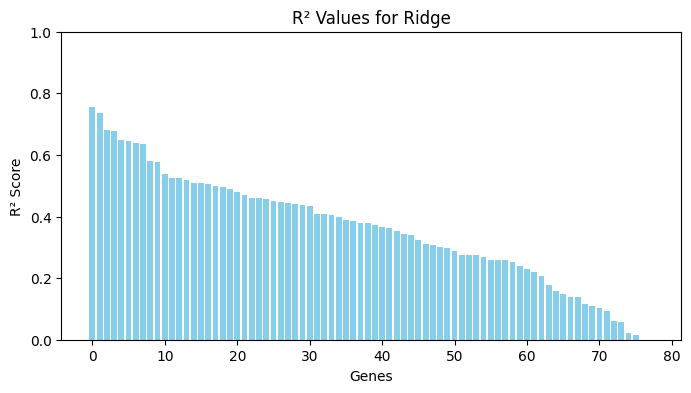

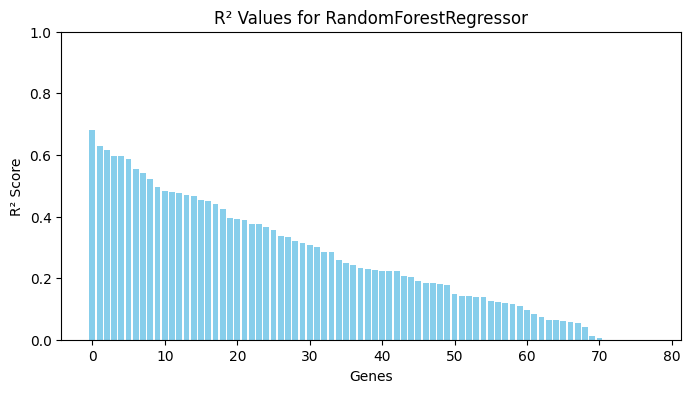

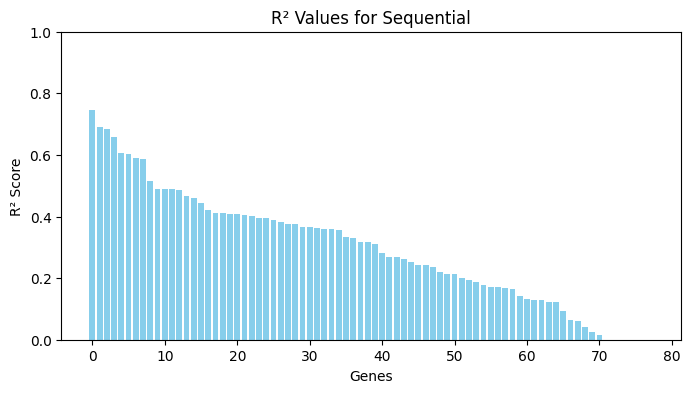

In [37]:
results_ExE = iterate_over_proportion_only_interactions(ExE, proportion, predictive_models_ExE)
print_results(results_ExE)
plot_results(results_ExE)

## NxN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1


Model: Pipeline
Average R²:   0.0911
Average RMSE: 0.0354

Model: Lasso
Average R²:   0.2143
Average RMSE: 0.0328

Model: Ridge
Average R²:   0.2101
Average RMSE: 0.0332

Model: RandomForestRegressor
Average R²:   0.0391
Average RMSE: 0.0370

Model: Sequential
Average R²:   0.1728
Average RMSE: 0.0340


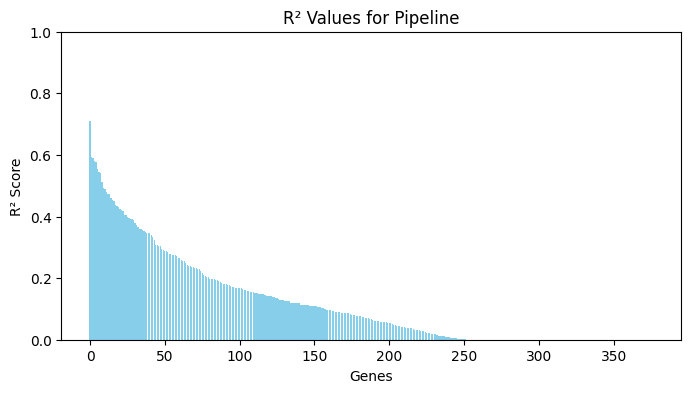

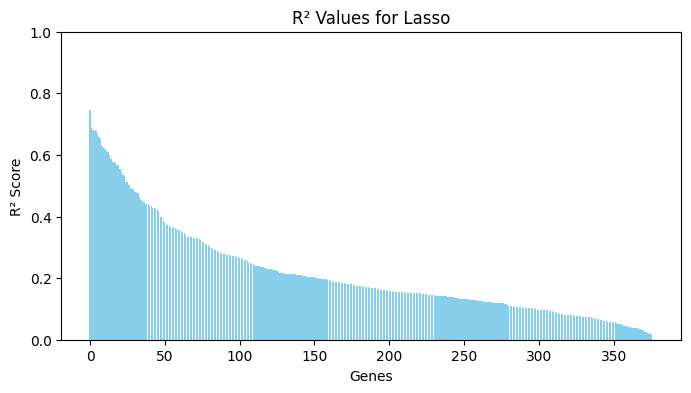

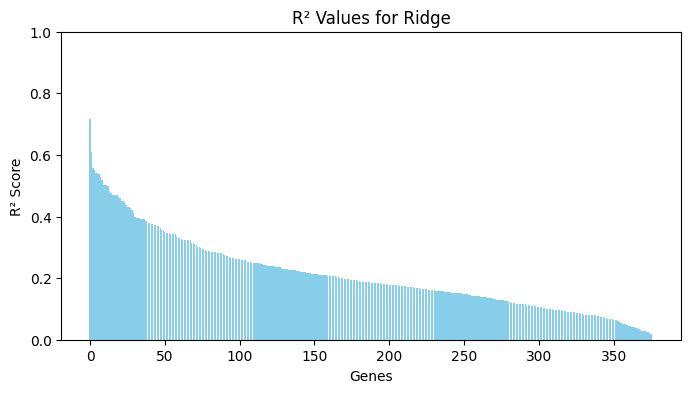

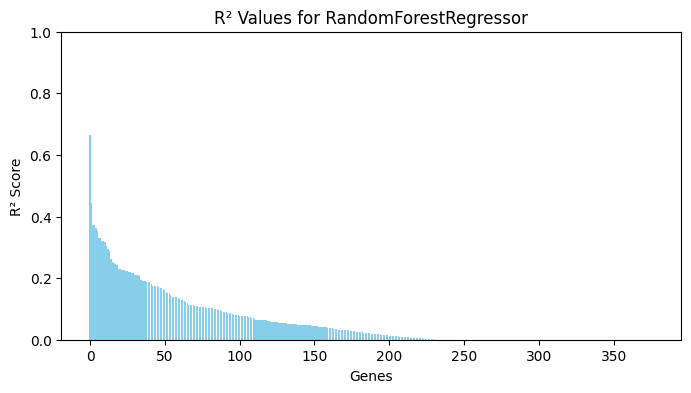

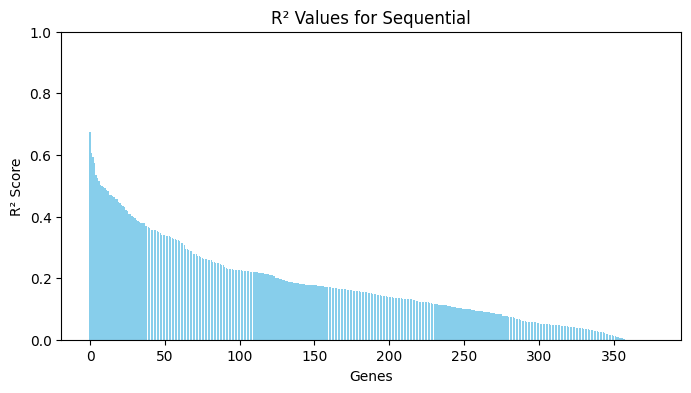

In [ ]:
results_NxN = iterate_over_proportion_only_interactions(NxN, proportion, predictive_models_NxN)
print_results(results_NxN)
plot_results(results_NxN)

## ExN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1


Model: Pipeline
Average R²:   0.2525
Average RMSE: 0.0423

Model: Lasso
Average R²:   0.3075
Average RMSE: 0.0409

Model: Ridge
Average R²:   0.3317
Average RMSE: 0.0401

Model: RandomForestRegressor
Average R²:   0.1956
Average RMSE: 0.0442

Model: Sequential
Average R²:   0.3090
Average RMSE: 0.0408


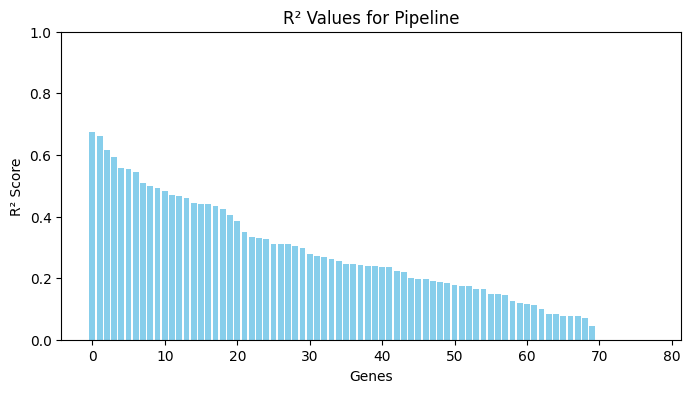

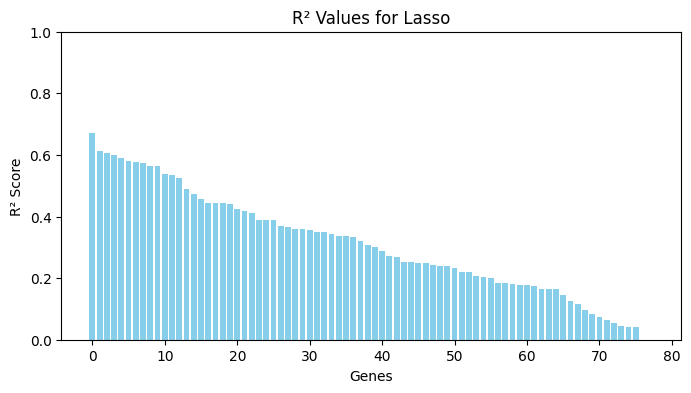

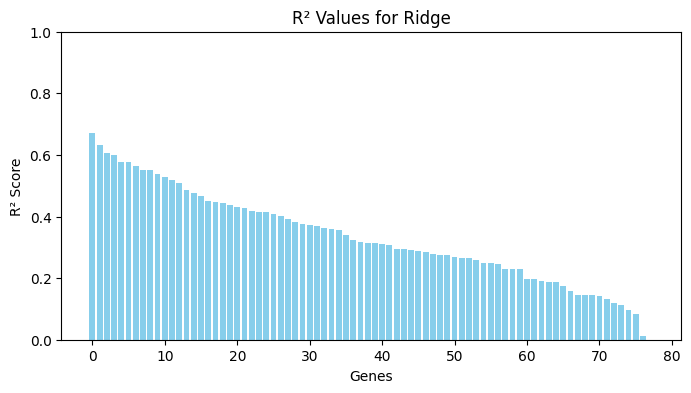

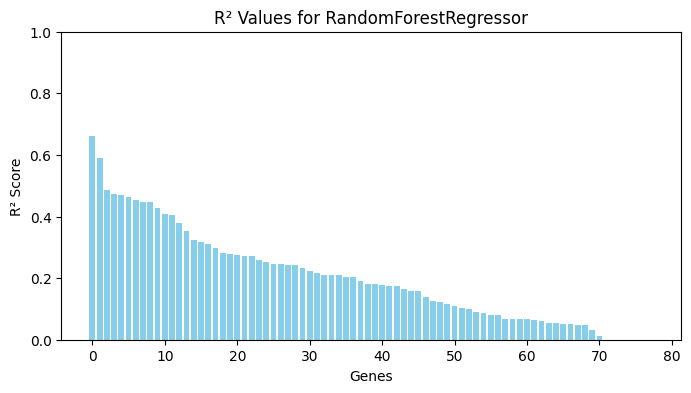

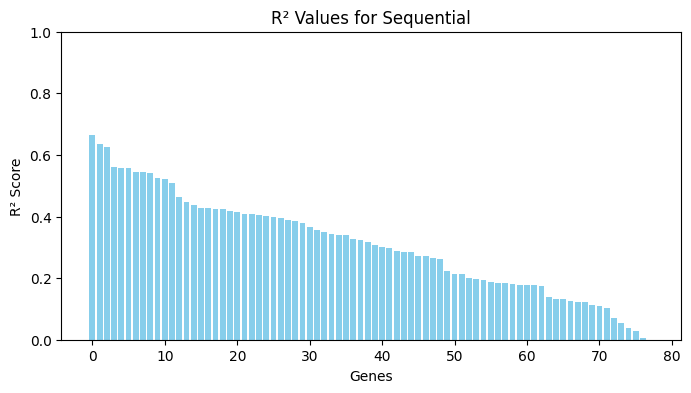

In [ ]:
results_ExN = iterate_over_proportion_only_interactions(ExN, proportion, predictive_models_ExN)
print_results(results_ExN)
plot_results(results_ExN)


## Compilation Date

In [ ]:
from datetime import datetime

now = datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))

2025-05-14 20:47:40
